In [152]:
from sklearn.manifold import TSNE
import os
import numpy as np
import json
from bidict import bidict
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [38]:
%matplotlib inline
plt.style.use(['dark_background', 'ggplot'])
sns.set(color_codes=True)
sns.set_palette(sns.color_palette('dark'))

In [4]:
def load_embeddings(dataset, model):
    path = "/data/rali7/Tmp/solimanz/data/embs/"
    return np.load(os.path.join(path, dataset, f"{model}_emb.npy"))

In [56]:
def load_fasttext(dataset):
    path = f"/data/rali7/Tmp/solimanz/data/datasets/{dataset}/fasttext/embeddings.npy"
    return np.load(path)

In [12]:
path550 = "/data/rali7/Tmp/solimanz/data/datasets/top550/"
path7k = "/data/rali7/Tmp/solimanz/data/datasets/reduced7000/"

# Load data dicts
with open(os.path.join(path550, "jobid", "data.json"), "r") as f:
    data550 = json.load(f)
with open(os.path.join(path7k, "jobid", "data.json"), "r") as f:
    data7k = json.load(f)
    
title_id_550 = bidict(data550['title_to_id'])
title_id_7k = bidict(data7k['title_to_id'])

In [57]:
ft_550 =  load_fasttext('top550')
ft_7k =  load_fasttext('reduced7000')

In [101]:
embs_550 = load_embeddings('top550', 'fasttext')
embs_7k = load_embeddings('reduced7000', 'fasttext')

In [25]:
def get_labels(title_id):
    return [t[0] for t in sorted(title_id.items(), key=lambda t: t[1])]

In [102]:
labels_550 = get_labels(title_id_550)
labels_7k = get_labels(title_id_7k)

In [127]:
def fit_tSNE(embs, n_components=2):
    tnse = TSNE(n_components=n_components, random_state=0)
    #np.set_printoptions(suppress=True)
    return tnse.fit_transform(embs)

In [72]:
tsne_ft_550 = fit_tSNE(ft_550)
tsne_ft_7k = fit_tSNE(ft_7k)

In [130]:
tSNE_550 = fit_tSNE(embs_550)
tSNE_7k = fit_tSNE(embs_7k)

# Plotting t-SNE

In [132]:
def tSNE_plot(new_values):
    x = []
    y = []
    #z = []
    #fig = plt.figure(figsize=(30, 30))
    #ax = fig.add_subplot(111, projection='3d')
    
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        #z.append(value[2]) 
    plt.figure(figsize=(16, 16))
    plt.scatter(x,y)
    plt.show()

In [169]:
random.randint(0, 3)

2

In [214]:
def tsne_plot(new_values, labels):
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):        
        if 'programmer' in labels[i]:
            plt.scatter(x[i],y[i], color='black')
            #plt.annotate(labels[i],
            #             xy=(x[i], y[i]),
            #             xytext=(5, 2),
            #             textcoords='offset points',
            #             ha='right',
            #             va='bottom')
        elif 'engineer' in labels[i]:
            plt.scatter(x[i],y[i], color='red')
        elif 'marketing' in labels[i]:
            plt.scatter(x[i],y[i], color='green')
        else:
            plt.scatter(x[i],y[i], color='blue')
            
    plt.show()

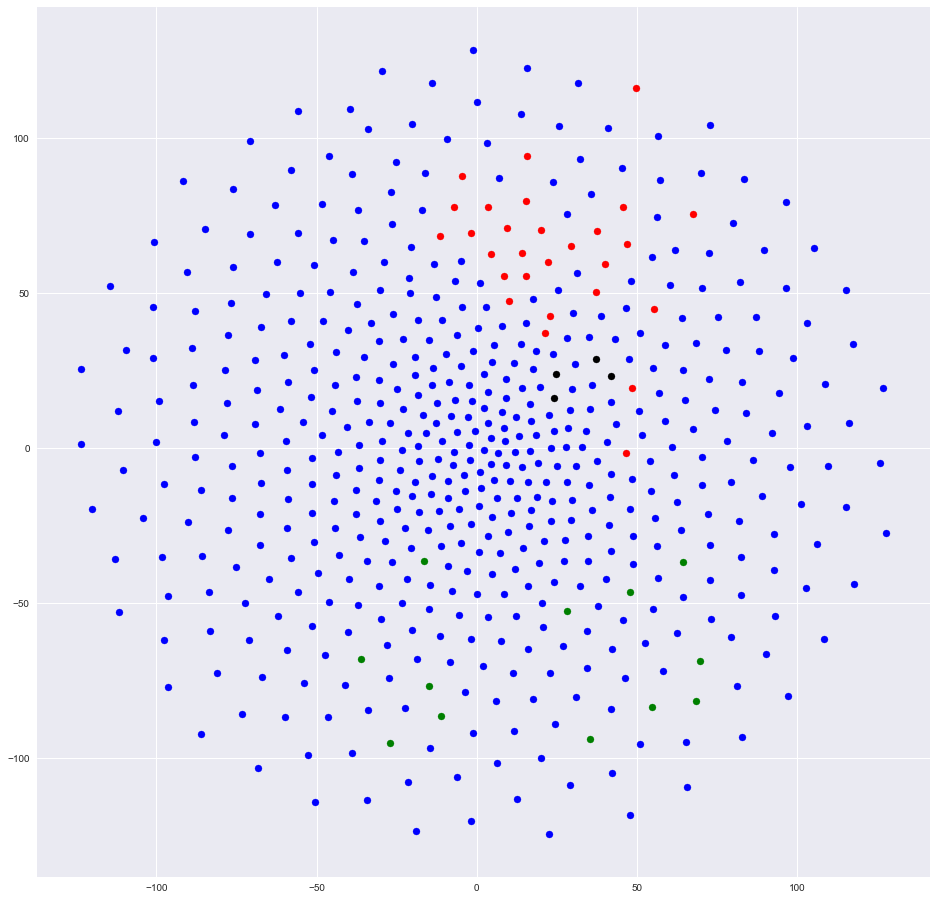

In [215]:
tsne_plot(tSNE_550, labels_550)

In [113]:
new_embs = []

for i in range(embs_550.shape[0]):
    if i not in to_remove:
        new_embs.append(embs_550[i])

In [115]:
new_embs = np.array(new_embs)

In [128]:
tSNE_550 = fit_tSNE(new_embs)